In [23]:
import numpy as np
import tensorflow as tf
import pathlib
import PIL

610236


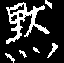

In [29]:

data_dir = pathlib.Path('Data/characters')

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

shutup = list(data_dir.glob('黙/*'))
PIL.Image.open(str(shutup[0]))


In [11]:
class_names = np.array(sorted(list(set([item.name[:1] for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))))

val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

488189
122047


In [ ]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

In [22]:
file_path = 'Data\cropped\あ001.png'
print(file_path)
parts = tf.strings.split(file_path, os.path.sep)
print(parts.to_list()[-1])
one_hot = parts[-2] == class_names
  # Integer encode the label
print(tf.argmax(one_hot))

Data\cropped\あ001.png


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'to_list'